<a href="https://colab.research.google.com/github/sunshineluyao/design-principle-blockchain/blob/main/code/NLP_Blockchain_Standard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Set-up

In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 228 kB/s 


In [2]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 4.9 MB/s 
     |████████████████████████████████| 1.6 MB 66.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [4]:
import pandas as pd
import numpy as np

In [5]:
df_standard = pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/design-principle-blockchain/main/data/blockchain_standard_development.csv")
df_standard

Institution  \
0                             The European Commission   
1                                                IEEE   
2                 The World Wide Web Consortium (W3C)   
3   International Association for Trusted Blockcha...   
4   National Institute of Standards and Technology...   
5              ANSI Accredited Standards Committee X9   
6   International Organization for Standardization...   
7   The European Union Agency for Cybersecurity (E...   
8   German Federal Office for Information Security...   
9         International Telecommunication Union (ITU)   
10  European Committee for Electrotechnical Standa...   

            Blockchain Standard Development Reference  
0   https://digital-strategy.ec.europa.eu/en/polic...  
1               https://blockchain.ieee.org/standards  
2   https://www.w3.org/2016/04/blockchain-workshop...  
3   https://inatba.org/standards-committee-working...  
4   https://nvlpubs.nist.gov/nistpubs/ir/2018/NIST...  
5   https://x9.org/wp-content/uploads/2018/04/Dist...  
6          https://www.iso.org/committee/6266604.html  
7   https://www.enisa.europa.eu/news/enisa-news/en...  
8   https://www.bsigroup.com/globalassets/localfil...  
9   https://www.itu.int/en/ITU-T/focusgroups/dlt/P...  
10  https://www.cencenelec.eu/areas-of-work/cenele...

In [6]:
print(df_standard.to_markdown(index=False)) 

| Institution                                                           | Blockchain Standard Development Reference                                                                           |
|:----------------------------------------------------------------------|:--------------------------------------------------------------------------------------------------------------------|
| The European Commission                                               | https://digital-strategy.ec.europa.eu/en/policies/blockchain-standards                                              |
| IEEE                                                                  | https://blockchain.ieee.org/standards                                                                               |
| The World Wide Web Consortium (W3C)                                   | https://www.w3.org/2016/04/blockchain-workshop/report.html                                                          |
| International Association for Trusted 

In [7]:
df= pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/design-principle-blockchain/main/data/blockchain_standard_papers.csv")
df

Title  \
0  Comparing Blockchain Standards\nand Recommenda...   
1      Blockchain Standards for Compliance and Trust   
2  Global Standards  Mapping Initiative:  An over...   
3  A Web-based Ledger Data Model and Format: A po...   
4        Linked Data Indexing of Distributed Ledgers   
5  Developing Open and Interoperable DLT\/Blockch...   

                                            Abstract  \
0  Since the introduction of Bitcoin, the term “b...   
1  Blockchain methods are emerging as practical t...   
2  As blockchain technology continues its evoluti...   
3  Decentralized ledgers (aka blockchains) have b...   
4  Searching for information in distributed ledge...   
5  Reports on the development of Open and Interop...   

                                                 URL  \
0       https://www.mdpi.com/1999-5903/12/12/222/pdf   
1         https://anjum.web.cern.ch/papers/d4sta.pdf   
2  https://www.weforum.org/whitepapers/global-sta...   
3  https://www.w3.org/2016/04/blockchain-workshop...   
4            http://oro.open.ac.uk/49736/1/p1431.pdf   
5  https://www.computer.org/csdl/magazine/co/2018...   

                                            Appendix  
0                                                NaN  
1                                                NaN  
2  https://www3.weforum.org/docs/WEF_AppendixA_Re...  
3                                                NaN  
4                                                NaN  
5                                                NaN

In [8]:
short_columns = ['Title','URL']
df_short = df[short_columns]
df_short

Title  \
0  Comparing Blockchain Standards\nand Recommenda...   
1      Blockchain Standards for Compliance and Trust   
2  Global Standards  Mapping Initiative:  An over...   
3  A Web-based Ledger Data Model and Format: A po...   
4        Linked Data Indexing of Distributed Ledgers   
5  Developing Open and Interoperable DLT\/Blockch...   

                                                 URL  
0       https://www.mdpi.com/1999-5903/12/12/222/pdf  
1         https://anjum.web.cern.ch/papers/d4sta.pdf  
2  https://www.weforum.org/whitepapers/global-sta...  
3  https://www.w3.org/2016/04/blockchain-workshop...  
4            http://oro.open.ac.uk/49736/1/p1431.pdf  
5  https://www.computer.org/csdl/magazine/co/2018...

In [9]:
print(df_short.to_markdown(index=False)) 

| Title                                                                                                            | URL                                                                                                                   |
|:-----------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------|
| Comparing Blockchain Standards                                                                                   | https://www.mdpi.com/1999-5903/12/12/222/pdf                                                                          |
| and Recommendations                                                                                              |                                                                                                                       |
| Blockchain Standards for Compliance and Trust     

# Part I The World Cloud

## 1.1. Title

In [10]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Comparing Blockchain Standards\nand Recommendations,Blockchain Standards for Compliance and Trust,Global Standards  Mapping Initiative:  An overview of blockchain technical standards,A Web-based Ledger Data Model and Format: A position statement by Digital Bazaar for the W3C Blockchain Workshop,Linked Data Indexing of Distributed Ledgers,Developing Open and Interoperable DLT\\/Blockchain Standards '

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review","white","paper","whitepaper"])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

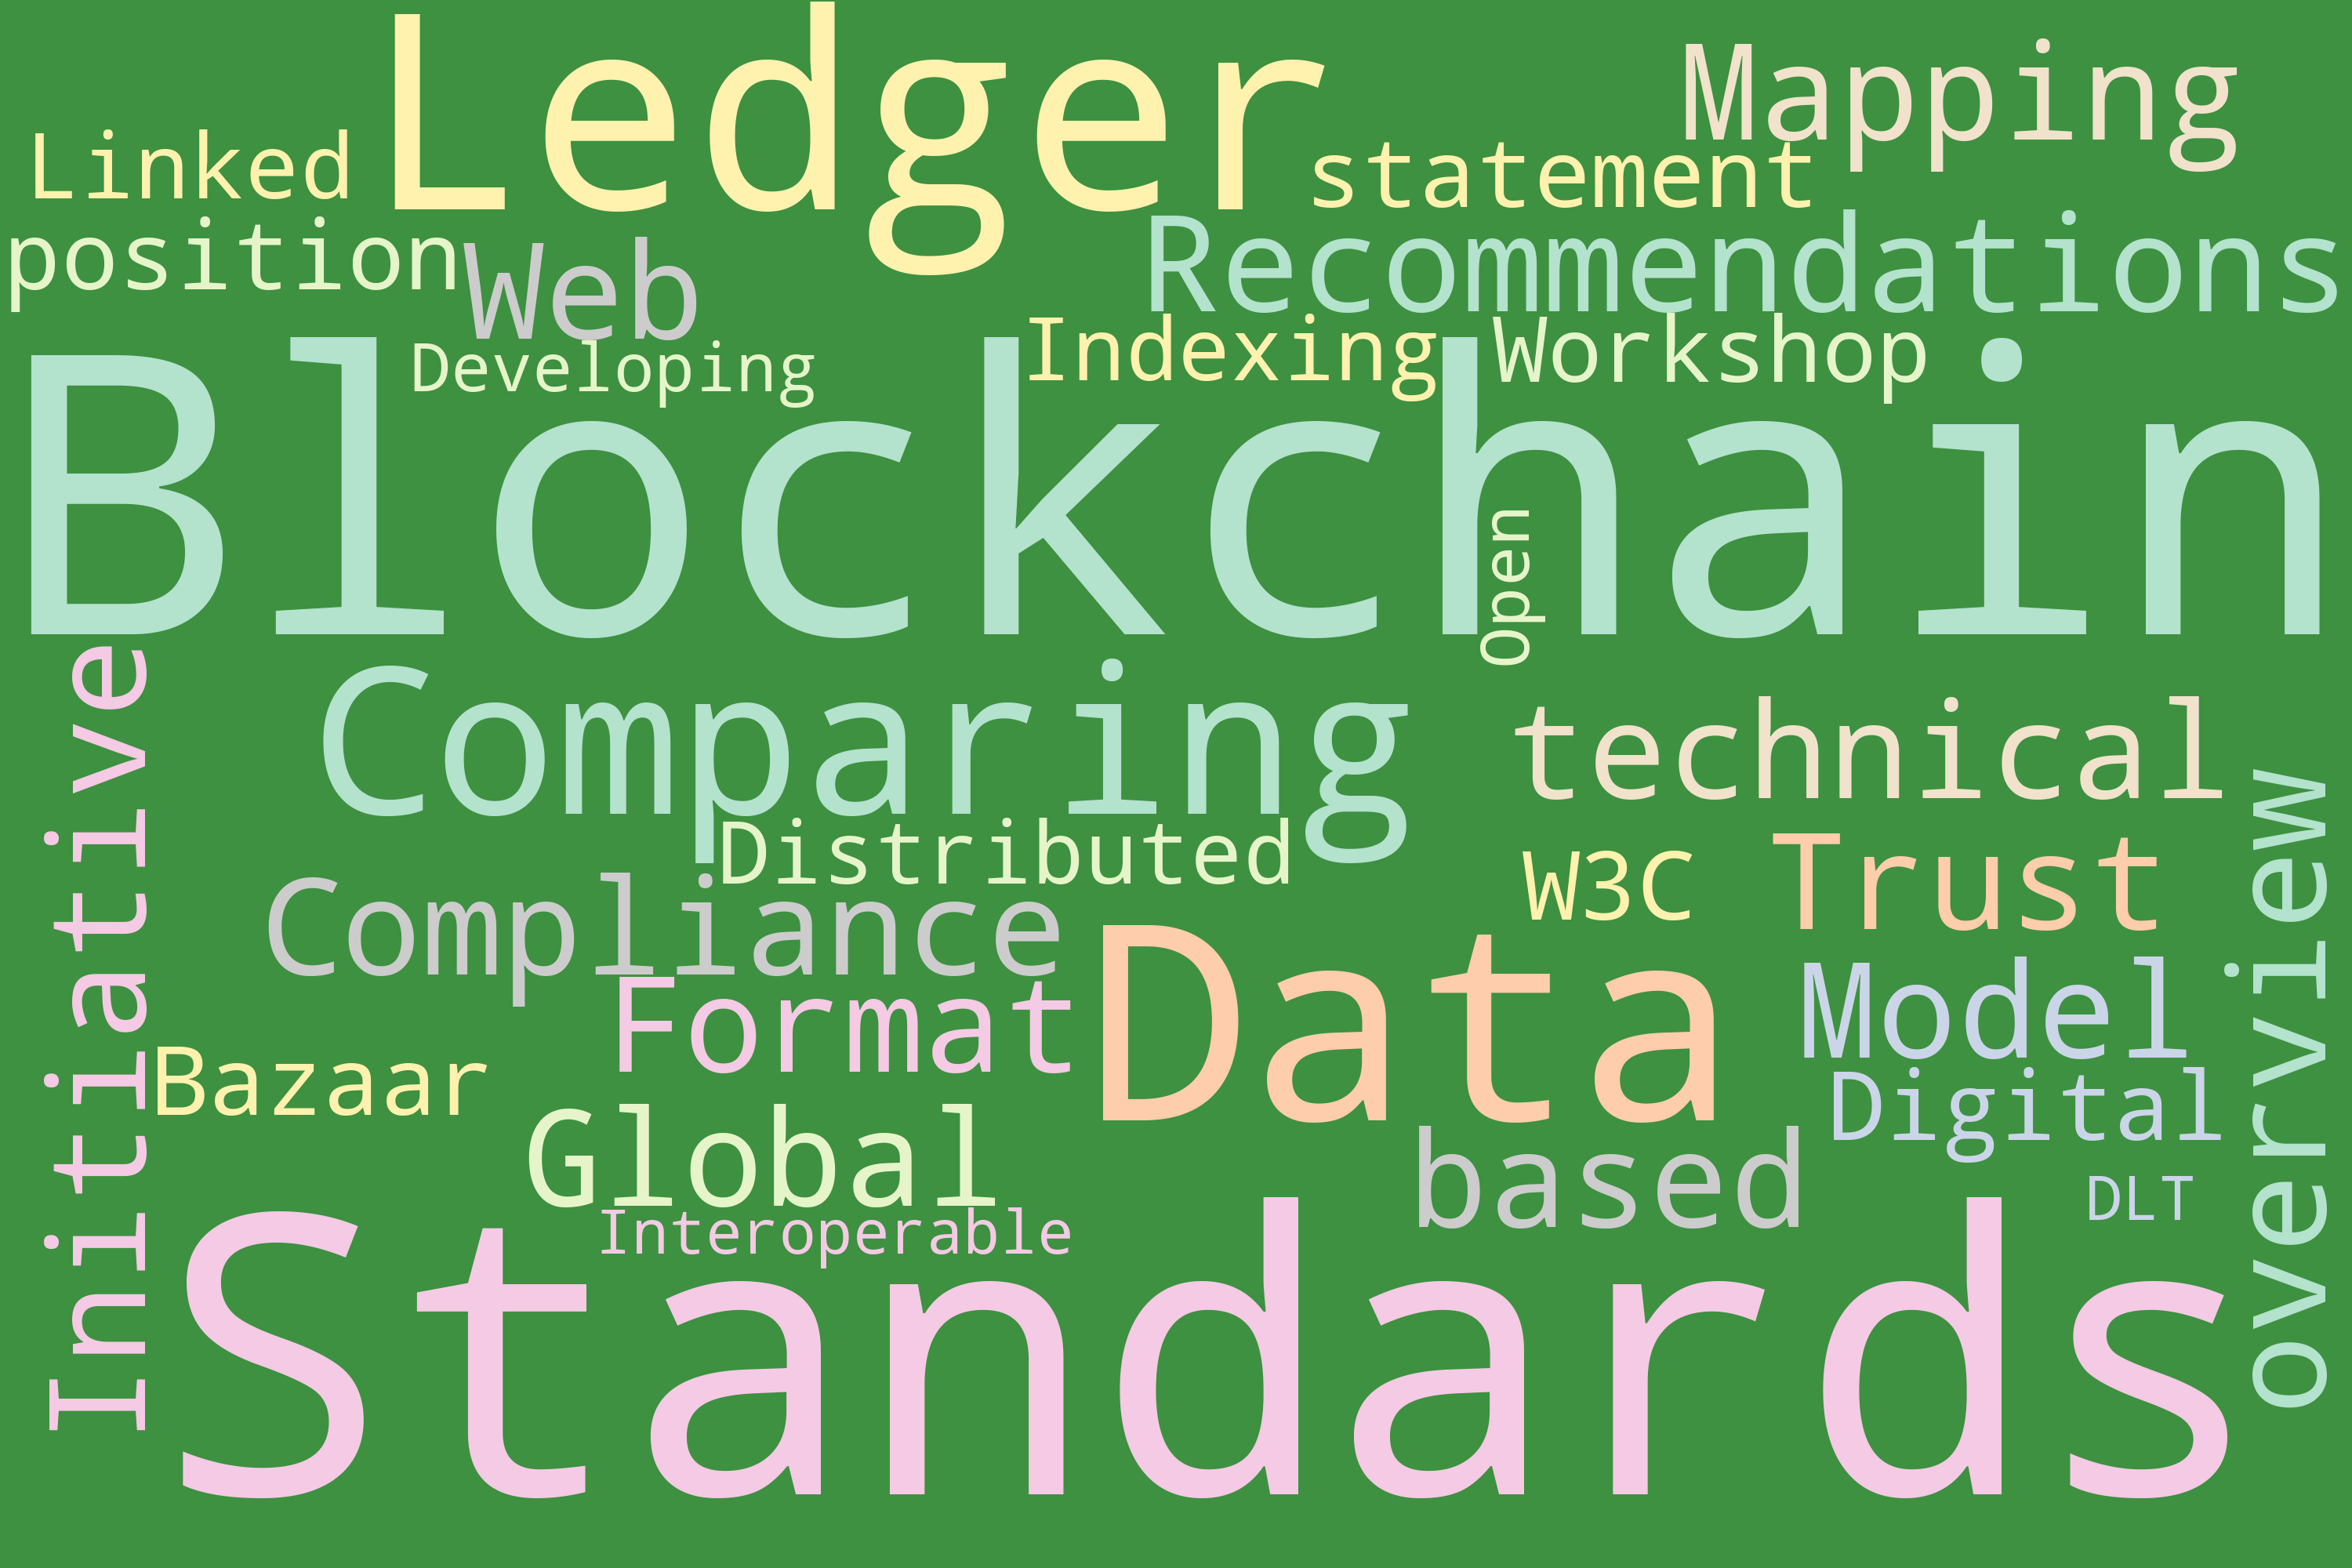

In [14]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

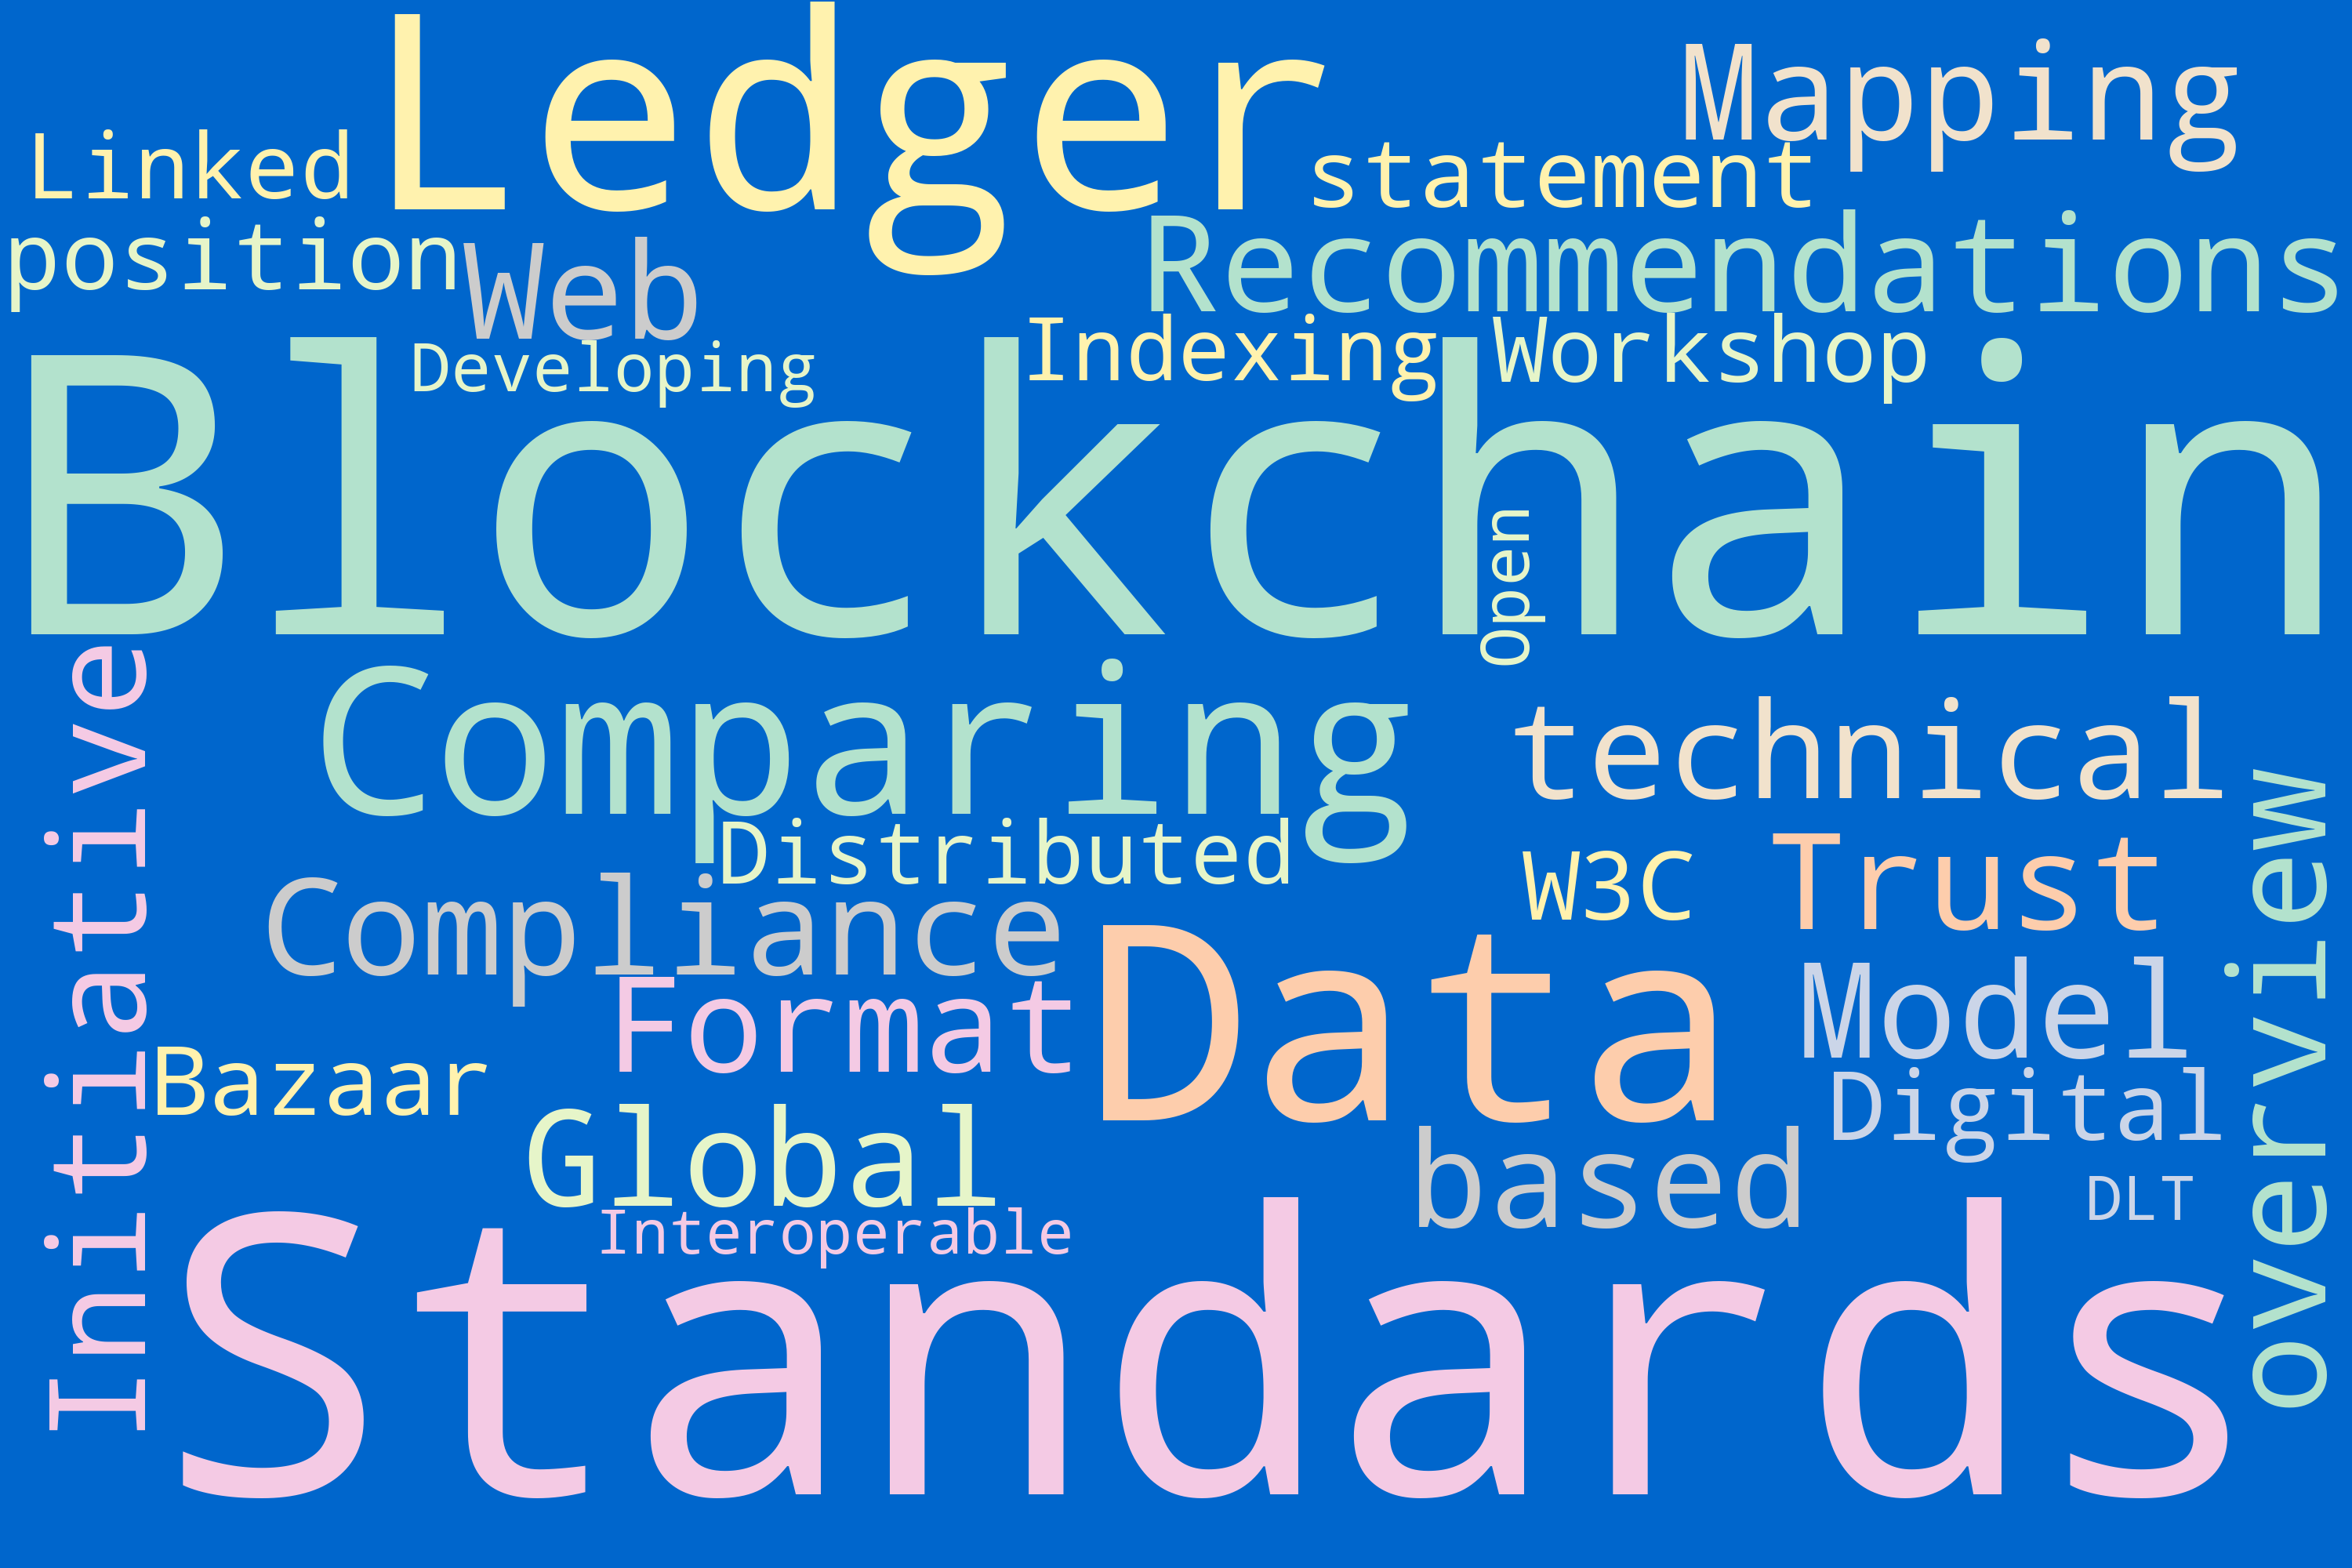

In [15]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [16]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

'Since the introduction of Bitcoin, the term “blockchain” has attracted many start-ups and\ncompanies over the years, especially in the financial sector. However, technology is evolving faster\nthan standardization frameworks. This left the industry in the position of having to use this emerging\ntechnology, without being backed by any international standards organization regarding for neither\nthe technology itself, nor for a blockchain specific information security framework. In times of the\nGeneral Data Protection Regulation and growing international trade conflicts, protecting information\nis more relevant than ever. Standardization of blockchains is an appeal to raise the development\nof information technologies to the next level. Therefore, this paper shall provide an overview\nof standardization organization’s publications about blockchains/distributed ledger technologies,\na set of comparison criteria for future work and a comparison of the existing standards work itself.\nWit

In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

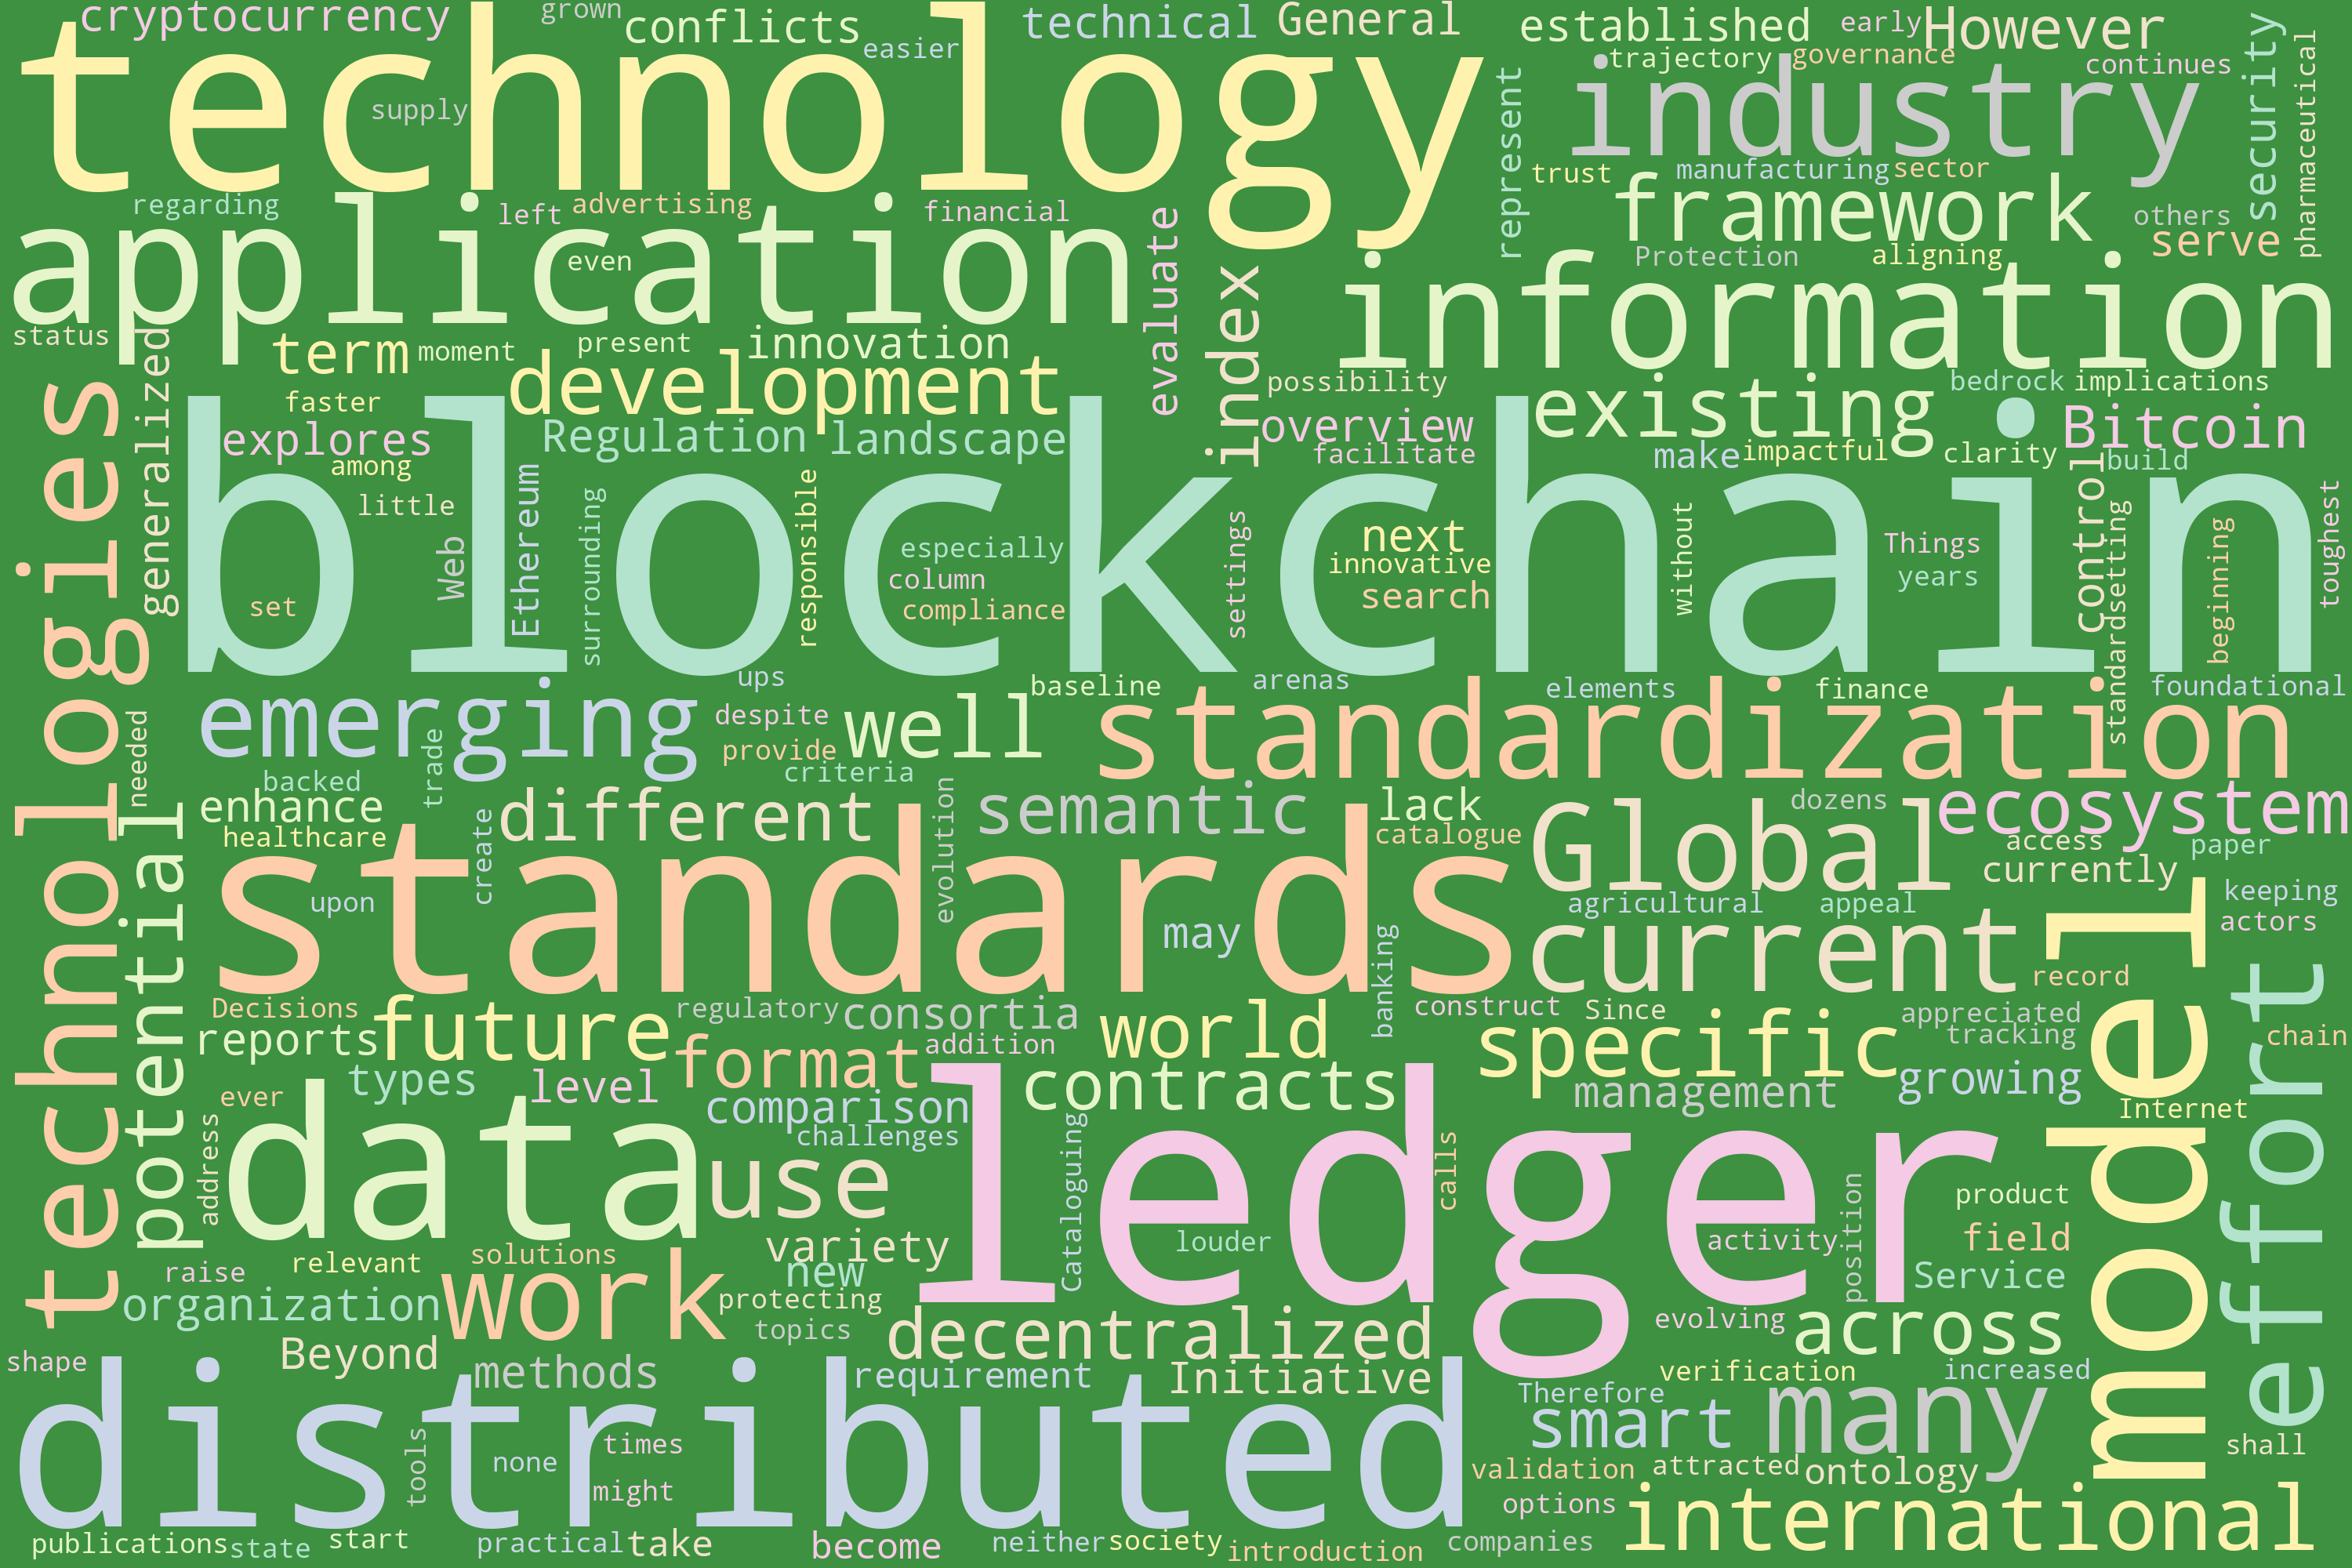

In [18]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

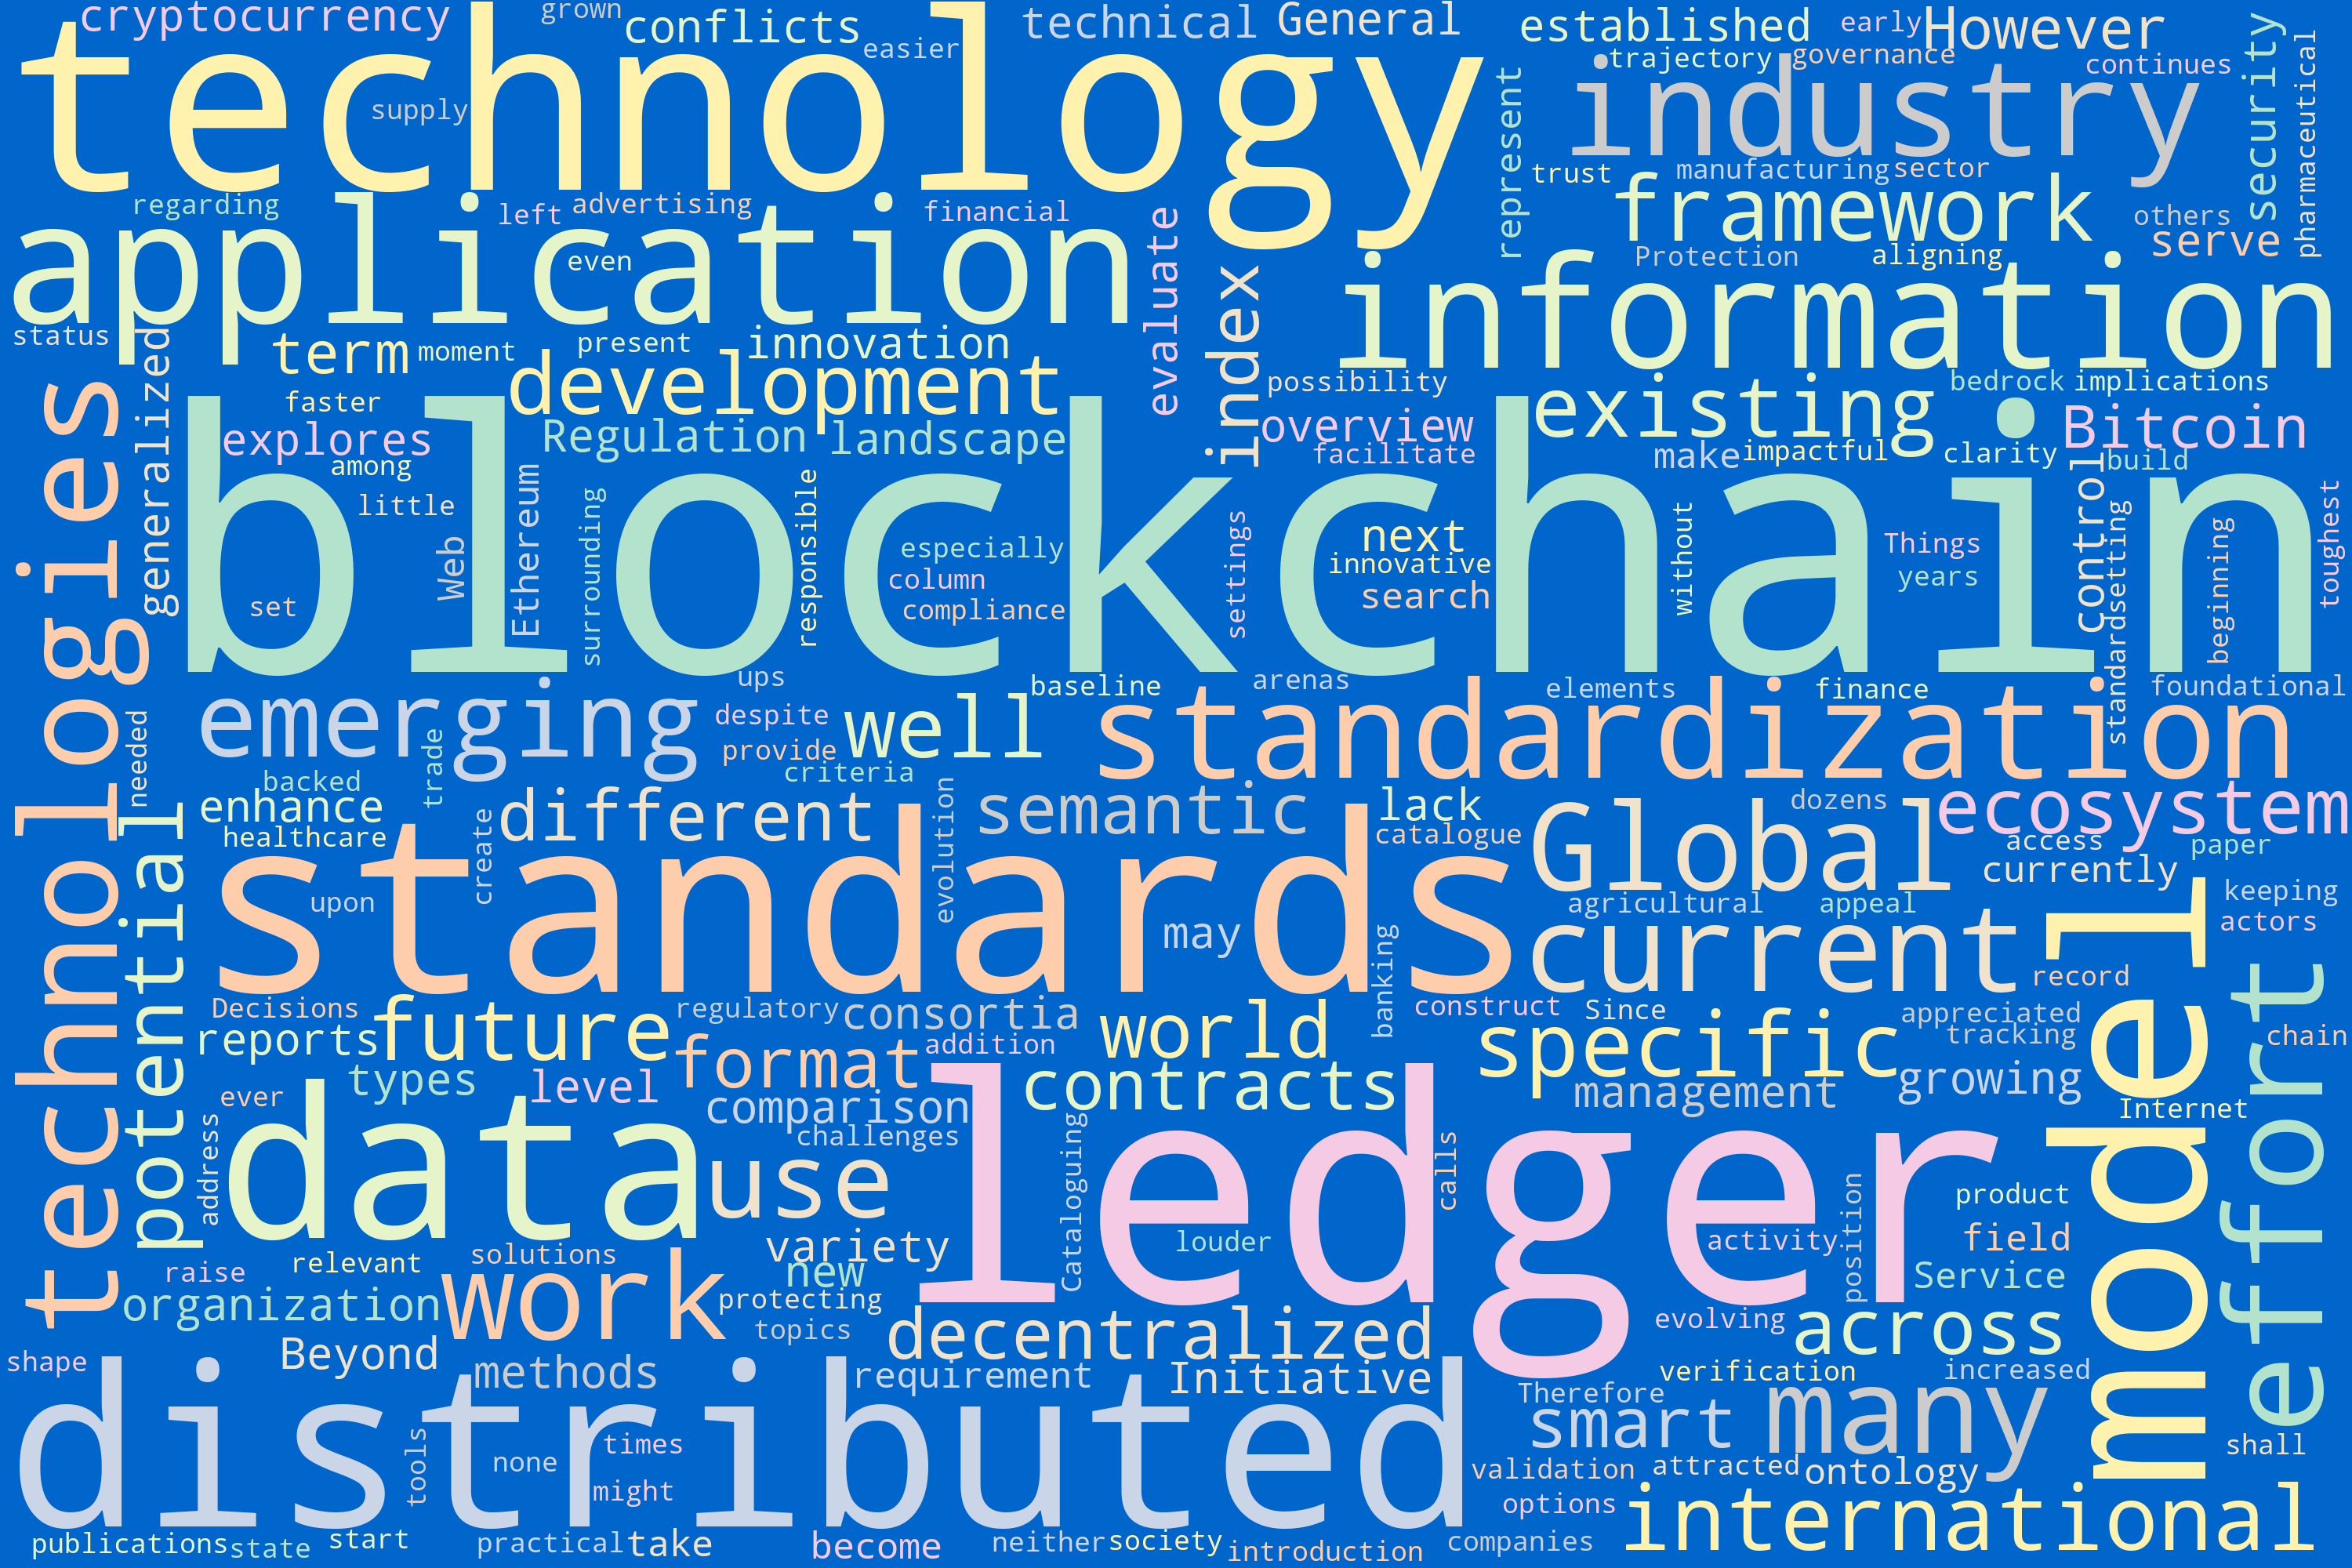

In [19]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [20]:
df.columns

Index(['Title', 'Abstract', 'URL', 'Appendix'], dtype='object')

In [21]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [22]:
df_Title  = df['Title'].str.lower()

In [23]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles =Titles.replace("$"," ")
Titles

'comparing blockchain standards\nand recommendations  blockchain standards for compliance and trust  global standards  mapping initiative   an overview of blockchain technical standards  web-based ledger data model and format  position statement by digital bazaar for the w3c blockchain workshop  linked data indexing of distributed ledgers  developing open and interoperable dlt\\/blockchain standards '

In [24]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [25]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [26]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['comparing',
 'blockchain',
 'standard',
 'and',
 'recommendation',
 'blockchain',
 'standard',
 'for',
 'compliance',
 'and',
 'trust',
 'global',
 'standard',
 'mapping',
 'initiative',
 'an',
 'overview',
 'of',
 'blockchain',
 'technical',
 'standard',
 'web-based',
 'ledger',
 'data',
 'model',
 'and',
 'format',
 'position',
 'statement',
 'by',
 'digital',
 'bazaar',
 'for',
 'the',
 'w3c',
 'blockchain',
 'workshop',
 'linked',
 'data',
 'indexing',
 'of',
 'distributed',
 'ledger',
 'developing',
 'open',
 'and',
 'interoperable',
 'dlt\\/blockchain',
 'standard']

In [29]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','white','paper']]
words_nsw

['comparing',
 'blockchain',
 'standard',
 'recommendation',
 'blockchain',
 'standard',
 'compliance',
 'trust',
 'global',
 'standard',
 'mapping',
 'initiative',
 'overview',
 'blockchain',
 'technical',
 'standard',
 'web-based',
 'ledger',
 'data',
 'model',
 'format',
 'position',
 'statement',
 'digital',
 'bazaar',
 'w3c',
 'blockchain',
 'workshop',
 'linked',
 'data',
 'indexing',
 'distributed',
 'ledger',
 'developing',
 'open',
 'interoperable',
 'dlt\\/blockchain',
 'standard']

In [30]:
import collections

In [31]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [32]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(25)

bigram  counts
0             (blockchain, standard)       2
1            (comparing, blockchain)       1
20             (position, statement)       1
21              (statement, digital)       1
22                 (digital, bazaar)       1
23                     (bazaar, w3c)       1
24                 (w3c, blockchain)       1
25            (blockchain, workshop)       1
26                (workshop, linked)       1
27                    (linked, data)       1
28                  (data, indexing)       1
29           (indexing, distributed)       1
30             (distributed, ledger)       1
31              (ledger, developing)       1
32                (developing, open)       1
33             (open, interoperable)       1
34  (interoperable, dlt\/blockchain)       1
19                (format, position)       1
18                   (model, format)       1
17                     (data, model)       1
8                (standard, mapping)       1
2         (standard, recommendation)       1
3       (recommendation, blockchain)       1
4             (standard, compliance)       1
5                (compliance, trust)       1

In [33]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                          bigram &  counts \\
\midrule
          (blockchain, standard) &       2 \\
         (comparing, blockchain) &       1 \\
           (position, statement) &       1 \\
            (statement, digital) &       1 \\
               (digital, bazaar) &       1 \\
                   (bazaar, w3c) &       1 \\
               (w3c, blockchain) &       1 \\
          (blockchain, workshop) &       1 \\
              (workshop, linked) &       1 \\
                  (linked, data) &       1 \\
                (data, indexing) &       1 \\
         (indexing, distributed) &       1 \\
           (distributed, ledger) &       1 \\
            (ledger, developing) &       1 \\
              (developing, open) &       1 \\
           (open, interoperable) &       1 \\
(interoperable, dlt\textbackslash /blockchain) &       1 \\
              (format, position) &       1 \\
                 (model, format) &       1 \\
                   (data, mo

In [34]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                                |   counts |
|:--------------------------------------|---------:|
| ('blockchain', 'standard')            |        2 |
| ('comparing', 'blockchain')           |        1 |
| ('position', 'statement')             |        1 |
| ('statement', 'digital')              |        1 |
| ('digital', 'bazaar')                 |        1 |
| ('bazaar', 'w3c')                     |        1 |
| ('w3c', 'blockchain')                 |        1 |
| ('blockchain', 'workshop')            |        1 |
| ('workshop', 'linked')                |        1 |
| ('linked', 'data')                    |        1 |
| ('data', 'indexing')                  |        1 |
| ('indexing', 'distributed')           |        1 |
| ('distributed', 'ledger')             |        1 |
| ('ledger', 'developing')              |        1 |
| ('developing', 'open')                |        1 |
| ('open', 'interoperable')             |        1 |
| ('interoperable', 'dlt\\/blockchain') |     

In [35]:
title_bigram.to_csv("title_bigram.csv")

In [36]:
import networkx as nx

In [37]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [38]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [39]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

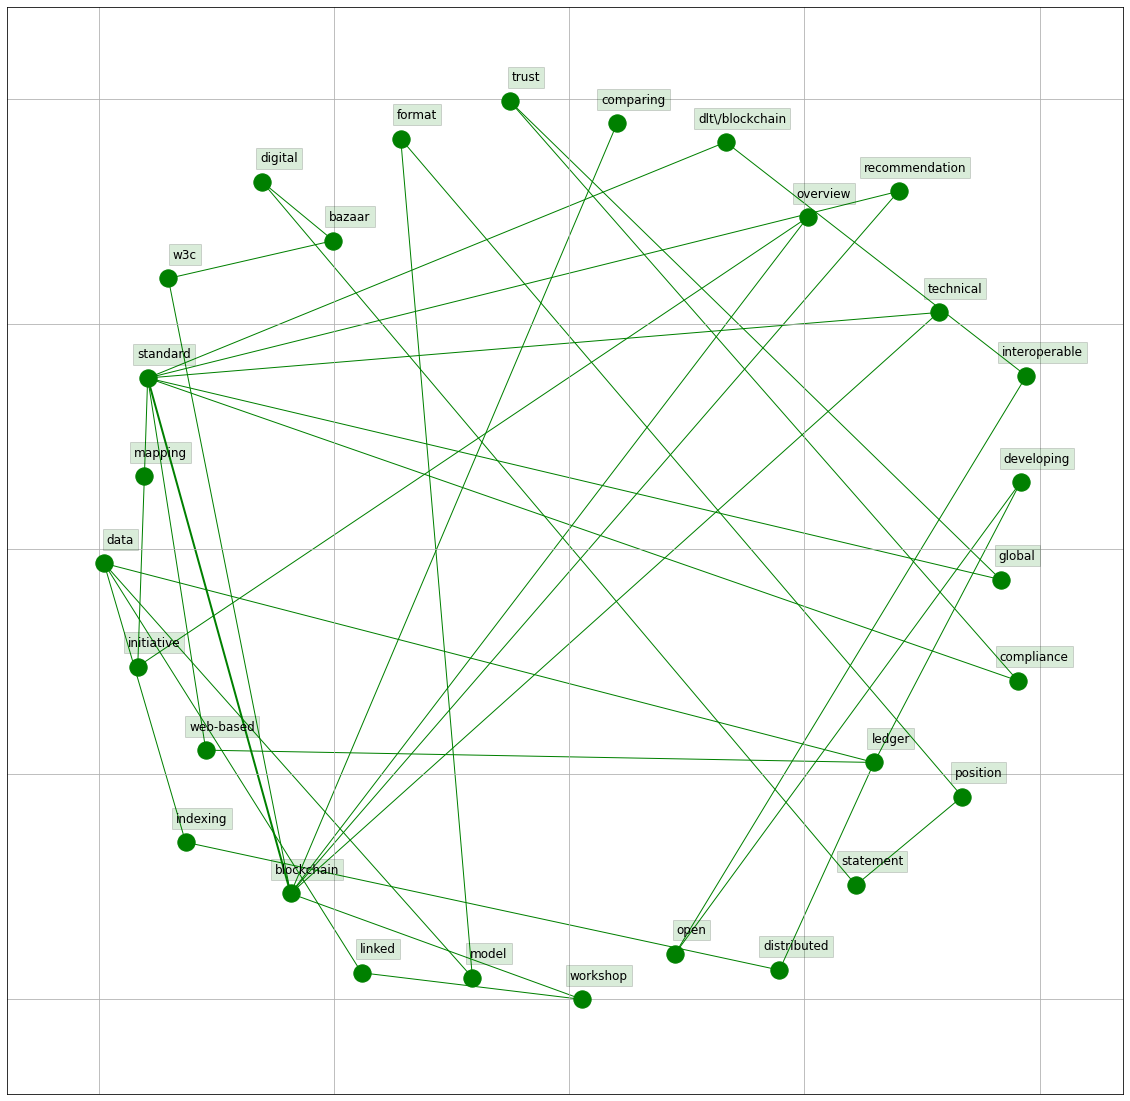

In [40]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [41]:
import igviz as ig

In [42]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [43]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-43-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [44]:
df_Abstract = df['Abstract'].str.lower()

In [45]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract =Abstract.replace('['," ")
Abstract =Abstract.replace(']'," ")
Abstract

'since the introduction of bitcoin  the term “blockchain” has attracted many start-ups and\ncompanies over the years  especially in the financial sector  however  technology is evolving faster\nthan standardization frameworks  this left the industry in the position of having to use this emerging\ntechnology  without being backed by any international standards organization regarding for neither\nthe technology itself  nor for blockchain specific information security framework  in times of the\ngeneral data protection regulation and growing international trade conflicts  protecting information\nis more relevant than ever  standardization of blockchains is an appeal to raise the development\nof information technologies to the next level  therefore  this paper shall provide an overview\nof standardization organization’s publications about blockchains/distributed ledger technologies \na set of comparison criteria for future work and comparison of the existing standards work itself \nwith th

In [46]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [47]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [48]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['since',
 'the',
 'introduction',
 'of',
 'bitcoin',
 'the',
 'term',
 '“blockchain”',
 'ha',
 'attracted',
 'many',
 'start-ups',
 'and',
 'company',
 'over',
 'the',
 'year',
 'especially',
 'in',
 'the',
 'financial',
 'sector',
 'however',
 'technology',
 'is',
 'evolving',
 'faster',
 'than',
 'standardization',
 'framework',
 'this',
 'left',
 'the',
 'industry',
 'in',
 'the',
 'position',
 'of',
 'having',
 'to',
 'use',
 'this',
 'emerging',
 'technology',
 'without',
 'being',
 'backed',
 'by',
 'any',
 'international',
 'standard',
 'organization',
 'regarding',
 'for',
 'neither',
 'the',
 'technology',
 'itself',
 'nor',
 'for',
 'blockchain',
 'specific',
 'information',
 'security',
 'framework',
 'in',
 'time',
 'of',
 'the',
 'general',
 'data',
 'protection',
 'regulation',
 'and',
 'growing',
 'international',
 'trade',
 'conflict',
 'protecting',
 'information',
 'is',
 'more',
 'relevant',
 'than',
 'ever',
 'standardization',
 'of',
 'blockchains',
 'is',
 'an',


In [50]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha','per','a']]
words_nsw

['since',
 'introduction',
 'bitcoin',
 'term',
 '“blockchain”',
 'attracted',
 'many',
 'start-ups',
 'company',
 'year',
 'especially',
 'financial',
 'sector',
 'however',
 'technology',
 'evolving',
 'faster',
 'standardization',
 'framework',
 'left',
 'industry',
 'position',
 'use',
 'emerging',
 'technology',
 'without',
 'backed',
 'international',
 'standard',
 'organization',
 'regarding',
 'neither',
 'technology',
 'blockchain',
 'specific',
 'information',
 'security',
 'framework',
 'time',
 'general',
 'data',
 'protection',
 'regulation',
 'growing',
 'international',
 'trade',
 'conflict',
 'protecting',
 'information',
 'relevant',
 'ever',
 'standardization',
 'blockchains',
 'appeal',
 'raise',
 'development',
 'information',
 'technology',
 'next',
 'level',
 'therefore',
 'paper',
 'shall',
 'provide',
 'overview',
 'standardization',
 'organization’s',
 'publication',
 'ledger',
 'technology',
 'set',
 'comparison',
 'criterion',
 'future',
 'work',
 'comparison

In [51]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [52]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0               (distributed, ledger)       7
2                       (data, model)       3
3                   (smart, contract)       3
1                (ledger, technology)       3
7                   (many, different)       2
9                      (ledger, data)       2
8                   (different, type)       2
10                    (model, format)       2
6                (global, blockchain)       2
5                (current, landscape)       2
4                       (next, level)       2
66         (development, information)       1
75  (standardization, organization’s)       1
74        (overview, standardization)       1
73                (provide, overview)       1
72                   (shall, provide)       1
71                     (paper, shall)       1
70                 (therefore, paper)       1
69                 (level, therefore)       1
68                 (technology, next)       1
67          (information, technology)       1
61            (ever, standardization)       1
65               (raise, development)       1
64                    (appeal, raise)       1
63              (blockchains, appeal)       1

In [53]:
print(abstract_bigram.head(45).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                           bigram &  counts \\
\midrule
            (distributed, ledger) &       7 \\
                    (data, model) &       3 \\
                (smart, contract) &       3 \\
             (ledger, technology) &       3 \\
                (many, different) &       2 \\
                   (ledger, data) &       2 \\
                (different, type) &       2 \\
                  (model, format) &       2 \\
             (global, blockchain) &       2 \\
             (current, landscape) &       2 \\
                    (next, level) &       2 \\
       (development, information) &       1 \\
(standardization, organization’s) &       1 \\
      (overview, standardization) &       1 \\
              (provide, overview) &       1 \\
                 (shall, provide) &       1 \\
                   (paper, shall) &       1 \\
               (therefore, paper) &       1 \\
               (level, therefore) &       1 \\
               (techno

In [54]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                                |   counts |
|:--------------------------------------|---------:|
| ('distributed', 'ledger')             |        7 |
| ('data', 'model')                     |        3 |
| ('smart', 'contract')                 |        3 |
| ('ledger', 'technology')              |        3 |
| ('many', 'different')                 |        2 |
| ('ledger', 'data')                    |        2 |
| ('different', 'type')                 |        2 |
| ('model', 'format')                   |        2 |
| ('global', 'blockchain')              |        2 |
| ('current', 'landscape')              |        2 |
| ('next', 'level')                     |        2 |
| ('development', 'information')        |        1 |
| ('standardization', 'organization’s') |        1 |
| ('overview', 'standardization')       |        1 |
| ('provide', 'overview')               |        1 |
| ('shall', 'provide')                  |        1 |
| ('paper', 'shall')                    |     

In [55]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [56]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [57]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

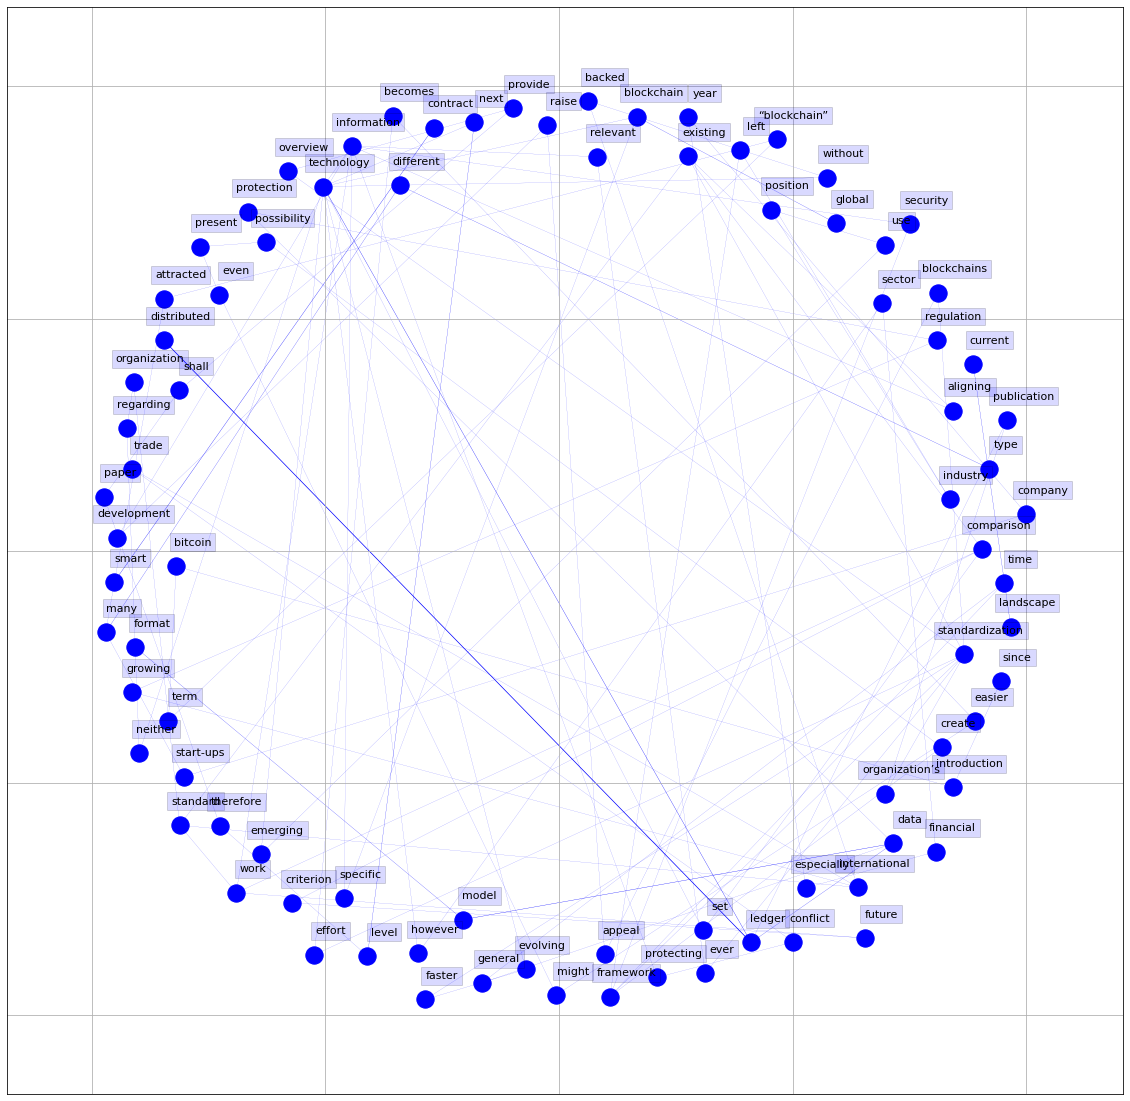

In [58]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [59]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [60]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-60-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

